In [1]:
import pandas as pd
import numpy as np

In [3]:
train_data= pd.read_csv("Train_data_liv_tox_14256.csv")
train_data = train_data[~train_data.Source_rank.isin([2, 4, 9, 10, 12])].reset_index(drop=True)
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_888.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_223.csv")

In [4]:
test_data_heldouttest

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,AAKJLRGGTJKAMG-UHFFFAOYSA-N,AAKJLRGGTJKAMG,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,...,0.000000,10.116298,64.016835,393.168856,7.560940,2396.0,43.0,142.0,163.0,6.833333
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,UJNUDOLLRRCQDH-UHFFFAOYSA-N,UJNUDOLLRRCQDH,CC1OC1[P](=O)(=O)O,0,0,...,7.753194,9.180603,57.029675,137.000370,9.785741,61.0,7.0,42.0,48.0,1.611111
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,UNAANXDKBXWMLN-UHFFFAOYSA-N,UNAANXDKBXWMLN,CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1,0,1,...,0.000000,10.141756,53.045750,280.182654,6.090927,666.0,29.0,98.0,116.0,4.194444
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,UXOWGYHJODZGMF-UHFFFAOYSA-N,UXOWGYHJODZGMF,COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...,0,1,...,0.000000,10.297521,75.192100,552.400713,5.939793,5882.0,58.0,184.0,206.0,8.930556
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,VGKDLMBJGBXTGI-UHFFFAOYSA-N,VGKDLMBJGBXTGI,C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,0,0,...,0.000000,10.027694,53.970324,306.081081,8.054765,770.0,34.0,106.0,127.0,4.472222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,JLYXXMFPNIAWKQ,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,0,...,0.000000,9.542876,43.309911,287.860066,15.992226,174.0,21.0,60.0,72.0,2.666667
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,JAUORDHNHDCTAS-UHFFFAOYSA-N,JAUORDHNHDCTAS,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,0,...,0.000000,10.364040,61.506713,366.102272,8.135606,1705.0,47.0,142.0,172.0,5.638889
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,MAGFQRLKWCCTQJ-UHFFFAOYSA-N,MAGFQRLKWCCTQJ,C=Cc1ccc(S(=O)(=O)[O-])cc1,0,0,...,0.000000,9.246190,42.667356,183.012139,9.632218,201.0,15.0,58.0,64.0,2.666667
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,LPYXWGMUVRGUOY-UHFFFAOYSA-N,LPYXWGMUVRGUOY,OCC(O)c1oc(O)c(O)c1O,0,1,...,6.985642,9.261509,56.914288,176.032088,8.801604,188.0,17.0,58.0,68.0,2.777778


In [5]:
test_data_ncv

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,Mfp0,Mfp1,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,COC1(NC(=O)CSC(F)F)C(=O)N2C(C(=O)O)=C(CSc3nnnn...,1,1,DILIst Classification,DILI,UHRBTBZOWWGKMK-UHFFFAOYSA-N,UHRBTBZOWWGKMK,COC1(NC(=O)CSC(F)F)C(=O)[NH+]2C(C(=O)[O-])=C(C...,0,1,...,6.555357,10.733545,82.269503,496.064645,9.921293,3113.0,51.0,166.0,200.0,7.250000
1,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)N1CCCC1,1,1,DILIst Classification,DILI,UIEATEWHFDRYRU-UHFFFAOYSA-N,UIEATEWHFDRYRU,CC(C)COCC(CN(Cc1ccccc1)c1ccccc1)[NH+]1CCCC1,0,1,...,6.293419,9.845276,74.440588,367.274390,5.923780,1895.0,34.0,132.0,148.0,6.138889
2,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)N2C1SC(C)...,1,1,DILIst Classification oral,DILI,UIOFUWFRIANQPC-UHFFFAOYSA-N,UIOFUWFRIANQPC,Cc1onc(-c2c(F)cccc2Cl)c1C(=O)NC1C(=O)[NH+]2C1S...,0,0,...,7.853605,10.768843,83.380114,453.056148,9.639493,2402.0,53.0,170.0,211.0,6.291667
3,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,1,1,DILIst Classification Oral,DILI,ULGZDMOVFRHVEP-UHFFFAOYSA-N,ULGZDMOVFRHVEP,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,0,0,...,0.000000,11.023323,89.748896,734.468518,6.172004,8842.0,101.0,270.0,324.0,11.013889
4,Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2,1,1,DILIst Classification,DILI,UMSGKTJDUHERQW-UHFFFAOYSA-N,UMSGKTJDUHERQW,Cc1nnc2n1-c1sc(Br)cc1C(c1ccccc1Cl)=NC2,0,0,...,7.618251,10.155063,72.828985,391.949807,12.248431,921.0,40.0,124.0,152.0,4.694444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,1,DILIst Classification,DILI,KYRVNWMVYQXFEU-UHFFFAOYSA-N,KYRVNWMVYQXFEU,COC(=O)N=c1[nH]c2ccc(C(=O)c3cccs3)cc2[nH]1,0,0,...,7.285507,9.858333,70.378545,301.052112,9.407879,994.0,29.0,110.0,129.0,4.666667
884,CC1CNc2c(cccc2S(=O)(=O)NC(CCCN=C(N)N)C(=O)N2CC...,0,1,DILIst Classification Intravenous,DILI,KXNPVXPOPUZYGB-UHFFFAOYSA-N,KXNPVXPOPUZYGB,CC1CNc2c(cccc2S(=O)(=O)NC(CCC[NH+]=C(N)N)C(=O)...,0,1,...,0.000000,10.488075,71.463013,509.254066,7.072973,3704.0,57.0,180.0,209.0,7.625000
885,CCC(c1cccc(O)c1)C(C)CN(C)C,0,1,DILIst Classification Oral,DILI,KWTWDQCKEHXFFR-UHFFFAOYSA-N,KWTWDQCKEHXFFR,CCC(c1cccc(O)c1)C(C)C[NH+](C)C,0,1,...,0.000000,9.353834,47.590867,222.185241,5.554631,448.0,21.0,74.0,82.0,3.722222
886,CC(N)Cc1ccccc1,0,1,DILIst Classification Oral,DILI,KWTSXDURSIMDCE-UHFFFAOYSA-N,KWTSXDURSIMDCE,CC([NH3+])Cc1ccccc1,0,1,...,0.000000,8.564268,38.519688,136.112076,5.671336,126.0,9.0,44.0,46.0,2.333333


In [7]:
mfp_features = train_data.columns[8:2056]
#MACCS0 should be ignored, its a dummy variable
maccs_features= train_data.columns[2057:2223]
physicochemical_features= train_data.columns[2223:2238]
mordred_features= train_data.columns[2238:]
identifiers = train_data.columns[:8]
liv_features = ["median pMolar unbound plasma concentration" ,
               "median pMolar total plasma concentration",
                "3",  "5", "6", "7", "8","11", "14", "15", "16"]

In [8]:
#Find similarity between each test compound and train set compounds MFP
#mean of the 5 highest tanimoto similarity of MFP keys, all, actives, inactives
#perc of compound with MFP TS>0.55, all, actives, inactives
from tqdm import tqdm
neighbours_limit = 3

def TanimotoSimilarity(ex1, ex2, attrs):
  """
    >>> v1 = [0,1,0,1]
    >>> v2 = [1,0,1,0]
    >>> TanimotoDist(v1,v2,range(4))
    1.0
    """
  inter = 0.0
  unin = 0.0
  for i in attrs:
    if (ex1[i] or ex2[i]):
      unin += 1
      if (ex1[i] and ex2[i]):
        inter += 1
  if (unin != 0.0):
    return (inter / unin)
  else:
    return 0

def BulkTanimoto(siv1, sivs):
    res = []
    for i in range(len(sivs)): 
        siv2 = sivs[i]
        simVal = TanimotoSimilarity(siv1, siv2, range(len(siv1)))
        res.append(simVal)
    return res


def findTSsimscore(assay, train, test): 
    
    smiles_r_list=[]
    ts_nearest_list =[]
    ts_nearest_actives_list=[]
    ts_nearest_inactives_list=[]
    perc_list=[]
    perc_actives_list=[]
    perc_inactives_list=[]
    
    for index, row in tqdm(test.iterrows()):

        smiles_r=row["smiles_r"]
        smiles_r_list.append(smiles_r)
        
        fps_test = row[mfp_features].to_numpy()
        fps_temp_train=[(x) for x in train[mfp_features].to_numpy()]

        ts_nearest = []
        ts_nearest = BulkTanimoto(fps_test ,fps_temp_train)

        #Add all values with Activity
        df_temp = pd.DataFrame([train[[assay]].values.flatten(), ts_nearest]).T
        df_temp.columns = ["TOXICITY", "TS_similarity"]
        
       
        #Calculate Ts 5nn
        ts_nearest_ovarall = df_temp.sort_values(by="TS_similarity", ascending=False)["TS_similarity"][:neighbours_limit].mean()
        ts_nearest_list.append(ts_nearest_ovarall)
    
    ts_nearest_list=np.array(ts_nearest_list)
    ts_nearest_list= ts_nearest_list.reshape(len(test))
    

    df_ts_nearest = pd.DataFrame({"smiles_r": smiles_r_list,
                                  "ts_nearest": ts_nearest_list})
    return df_ts_nearest

In [9]:
TS_similarity = findTSsimscore("TOXICITY", test_data_ncv, test_data_heldouttest)
TS_similarity

223it [00:31,  7.02it/s]


,smiles_r,ts_nearest
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0.246319
1,CC1OC1[P](=O)(=O)O,0.235178
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,0.244207
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,0.268495
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,0.238541
...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0.088813
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0.203165
220,C=Cc1ccc(S(=O)(=O)O)cc1,0.205958
221,OCC(O)c1oc(O)c(O)c1O,0.230432


In [10]:
TS_similarity.to_csv("TS_Similarity_223.csv", index=False)
TS_similarity

,smiles_r,ts_nearest
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,0.246319
1,CC1OC1[P](=O)(=O)O,0.235178
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,0.244207
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,0.268495
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,0.238541
...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0.088813
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0.203165
220,C=Cc1ccc(S(=O)(=O)O)cc1,0.205958
221,OCC(O)c1oc(O)c(O)c1O,0.230432


In [11]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

def fs_variance(df, threshold:float=0.05):
    """
    Return a list of selected variables based on the threshold.
    """

    # The list of columns in the data frame
    features = list(df.columns)
    
    # Initialize and fit the method
    vt = VarianceThreshold(threshold = threshold)
    _ = vt.fit(df)
    
    # Get which column names which pass the threshold
    feat_select = list(compress(features, vt.get_support()))
    
    return feat_select
selected_mfp_Features = fs_variance(train_data[mfp_features], threshold=0.05)
selected_maccs_Features = fs_variance(train_data[maccs_features], threshold=0.10)
selected_mordred_features = fs_variance(train_data[mordred_features], threshold=0.10)

print(len(selected_mfp_Features))
print(len(selected_maccs_Features))
print(len(selected_mordred_features))

89
100
653


In [12]:
all_features = list(identifiers)+ list(selected_mordred_features)  +list(selected_mfp_Features)+  list(selected_maccs_Features)+  list(physicochemical_features) +list(liv_features)
all_features

['smiles_r',
 'TOXICITY',
 'Source_rank',
 'Source',
 'Data',
 'InChIKey',
 'InChIKey14',
 'protonated_smiles_r',
 'ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe'

In [13]:
test_data_ncv= pd.read_csv("test_data_ncv_DILIst_888_livpreds.csv")
test_data_heldouttest= pd.read_csv("test_data_heldouttest_DILIst_223_livpreds.csv")

In [14]:
test_data_heldouttest = test_data_heldouttest[all_features]
test_data_ncv = test_data_ncv[all_features]

In [15]:
test_data_heldouttest

,smiles_r,TOXICITY,Source_rank,Source,Data,InChIKey,InChIKey14,protonated_smiles_r,ABC,ABCGG,...,median pMolar total plasma concentration,3,5,6,7,8,11,14,15,16
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,AAKJLRGGTJKAMG-UHFFFAOYSA-N,AAKJLRGGTJKAMG,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,21.798990,16.570489,...,5.992269,0.557014,0.456931,0.528568,0.699336,0.440255,0.739823,0.917653,0.210893,0.177884
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,UJNUDOLLRRCQDH-UHFFFAOYSA-N,UJNUDOLLRRCQDH,CC1OC1[P](=O)(=O)O,6.140950,6.624294,...,3.857602,0.350417,0.254330,0.419737,0.741401,0.643305,0.754410,0.098650,0.003482,0.352064
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,UNAANXDKBXWMLN-UHFFFAOYSA-N,UNAANXDKBXWMLN,CC(C)CC([NH+](C)C)C1(c2ccc(Cl)cc2)CCC1,14.525425,13.493219,...,6.538902,0.322297,0.636731,0.748372,0.629842,0.381128,0.247584,0.711867,0.269017,0.394561
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,UXOWGYHJODZGMF-UHFFFAOYSA-N,UXOWGYHJODZGMF,COCCCOc1cc(CC(CC([NH3+])C(O)CC(C(=O)NCC(C)(C)C...,28.615700,24.127835,...,6.467869,0.595764,0.176782,0.204099,0.749477,0.215505,0.224412,0.647581,0.125612,0.125773
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,VGKDLMBJGBXTGI-UHFFFAOYSA-N,VGKDLMBJGBXTGI,C[NH2+]C1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,15.572928,12.623559,...,6.091766,0.708626,0.679524,0.736300,0.768673,0.484358,0.677590,0.820888,0.512452,0.275325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,JLYXXMFPNIAWKQ,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,8.898979,8.883053,...,4.684940,0.484429,0.493742,0.776004,0.975669,0.679461,0.630838,0.338608,0.046102,0.388372
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,JAUORDHNHDCTAS-UHFFFAOYSA-N,JAUORDHNHDCTAS,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,20.620135,15.444462,...,5.272305,0.602714,0.453562,0.574268,0.742759,0.312531,0.533994,0.758933,0.775398,0.234025
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,MAGFQRLKWCCTQJ-UHFFFAOYSA-N,MAGFQRLKWCCTQJ,C=Cc1ccc(S(=O)(=O)[O-])cc1,8.900428,8.287109,...,4.289188,0.346764,0.387101,0.537814,0.677393,0.424168,0.364305,0.055676,0.038728,0.200250
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,LPYXWGMUVRGUOY-UHFFFAOYSA-N,LPYXWGMUVRGUOY,OCC(O)c1oc(O)c(O)c1O,8.761080,9.017795,...,4.331399,0.351164,0.267904,0.340586,0.585938,0.207051,0.375699,0.157365,0.053731,0.166154


In [16]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"] , axis = 1)

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [17]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv.drop(["TOXICITY", "smiles_r", "Source_rank", "Source", "Data", "InChIKey", "InChIKey14", "protonated_smiles_r"] , axis = 1)

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [18]:
test_feature_list

['ABC',
 'ABCGG',
 'nAcid',
 'nBase',
 'SpAbs_A',
 'SpDiam_A',
 'SpAD_A',
 'LogEE_A',
 'VE1_A',
 'VE3_A',
 'VR1_A',
 'VR2_A',
 'nAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nBridgehead',
 'nHetero',
 'nH',
 'nC',
 'nN',
 'nO',
 'nS',
 'nF',
 'nCl',
 'nX',
 'ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6a

In [19]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(888, 868)
(223, 868)
888
223


In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import accuracy_score
from rdkit.Chem import DataStructs
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold

from numpy import argmax

In [21]:
from sklearn.model_selection import KFold
import pickle

loaded_rf = pickle.load(open("dili_bestNCV_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(max_depth=15, max_features=44, min_samples_leaf=14,
                       min_samples_split=5, n_estimators=600, n_jobs=40,
                       random_state=42)

Best Threshold=0.638612
[[41 26]
 [68 88]]
              precision    recall  f1-score   support

           0       0.38      0.61      0.47        67
           1       0.77      0.56      0.65       156

    accuracy                           0.58       223
   macro avg       0.57      0.59      0.56       223
weighted avg       0.65      0.58      0.60       223

balanced_accuracy_score  0.5880214313050134
matthews_corrcoef  0.1614553527614774
0.6119402985074627
0.5641025641025641
roc_auc_score 0.6255262150784539


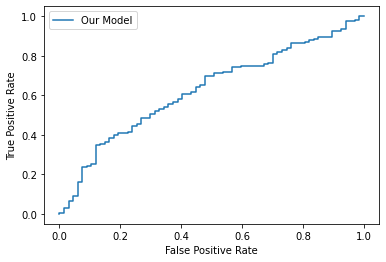

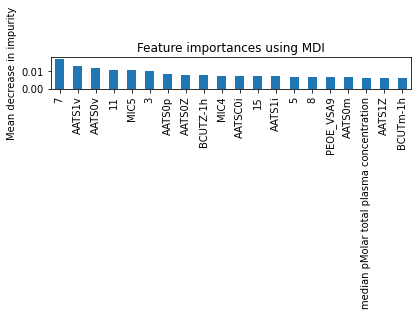

In [22]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

test_data_heldouttest["all_features_preds"] = y_pred
test_data_heldouttest["all_features_proba"] = y_proba

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

print(Sensitivity)
print(Specificity)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

In [23]:
df = pd.DataFrame()
df["fpr"]=best_model_fpr
df["tpr"]=best_model_tpr
#tpr is sensitivity
df["thresholds"]=np.round(_, 8)
df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.863313
1,0.000000,0.006410,0.863313
2,0.014925,0.006410,0.859563
3,0.014925,0.032051,0.847730
4,0.029851,0.032051,0.847187
...,...,...,...
96,0.970149,0.974359,0.398939
97,0.970149,0.980769,0.386789
98,0.985075,0.980769,0.384275
99,0.985075,1.000000,0.342263


In [24]:
df_analyse = test_data_heldouttest[["smiles_r","TOXICITY","Source_rank","Source","Data", "all_features_preds", "all_features_proba"]]
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,1,0.728152
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,0,0.581439
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,0,0.576492
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,0,0.463513
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,1,0.714039
...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,0,0.564779
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,1,0.775135
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,1,0.753467
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,0,0.486452


In [25]:
P=[]
N=[]
TP=[]
FP=[]
TN=[]
FN=[]

for threshold in df["thresholds"].to_list():

    P.append(len(df_analyse[df_analyse["all_features_proba"]>=threshold]))
    N.append(len(df_analyse[df_analyse["all_features_proba"]<threshold]))
    
    df_analyse_P = df_analyse[df_analyse["TOXICITY"]==1]
    TP.append(len(df_analyse_P[df_analyse_P["all_features_proba"]>=threshold]))
    FN.append(len(df_analyse_P[df_analyse_P["all_features_proba"]<threshold]))
    
    df_analyse_N = df_analyse[df_analyse["TOXICITY"]==0]
    FP.append(len(df_analyse_N[df_analyse_N["all_features_proba"]>=threshold]))
    TN.append(len(df_analyse_N[df_analyse_N["all_features_proba"]<threshold]))
                       
df["predP"] = P
df["predN"]= N
df["TP"] = TP
df["TN"]= TN
df["FP"] = FP
df["FN"]= FN

df_all_features_tpr_fpr = df
df_all_features_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN
0,0.000000,0.000000,1.863313,0,223,0,67,0,156
1,0.000000,0.006410,0.863313,0,223,0,67,0,156
2,0.014925,0.006410,0.859563,2,221,1,66,1,155
3,0.014925,0.032051,0.847730,6,217,5,66,1,151
4,0.029851,0.032051,0.847187,6,217,5,66,1,151
...,...,...,...,...,...,...,...,...,...
96,0.970149,0.974359,0.398939,216,7,152,3,64,4
97,0.970149,0.980769,0.386789,217,6,152,2,65,4
98,0.985075,0.980769,0.384275,219,4,153,1,66,3
99,0.985075,1.000000,0.342263,222,1,156,1,66,0


In [26]:
df_all_features_tpr_fpr["PPV"] = df_all_features_tpr_fpr["TP"]/df_all_features_tpr_fpr["predP"]
df_all_features_tpr_fpr["LR+"] = ((df_all_features_tpr_fpr["TP"])/(df_all_features_tpr_fpr["TP"]+df_all_features_tpr_fpr["FN"]))/((df_all_features_tpr_fpr["FP"])/(df_all_features_tpr_fpr["FP"]+df_all_features_tpr_fpr["TN"]))
df_all_features_tpr_fpr[:15]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.863313,0,223,0,67,0,156,NaN,NaN
1,0.000000,0.006410,0.863313,0,223,0,67,0,156,NaN,NaN
2,0.014925,0.006410,0.859563,2,221,1,66,1,155,0.500000,0.429487
3,0.014925,0.032051,0.847730,6,217,5,66,1,151,0.833333,2.147436
4,0.029851,0.032051,0.847187,6,217,5,66,1,151,0.833333,2.147436
5,0.029851,0.064103,0.808041,12,211,10,65,2,146,0.833333,2.147436
6,0.044776,0.064103,0.807819,12,211,10,65,2,146,0.833333,2.147436
7,0.044776,0.089744,0.801316,17,206,14,64,3,142,0.823529,2.004274
8,0.059701,0.089744,0.797652,18,205,14,63,4,142,0.777778,1.503205
9,0.059701,0.160256,0.778068,29,194,25,63,4,131,0.862069,2.684295


In [27]:
#Morgan and MACCS model

In [28]:
y_ncv = np.array(test_data_ncv['TOXICITY'])
test_features= test_data_ncv[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_ncv = np.array(test_features)

In [29]:
y_heldouttest = np.array(test_data_heldouttest['TOXICITY'])
test_features= test_data_heldouttest[selected_mfp_Features+selected_maccs_Features]

test_feature_list = list(test_features.columns)
X_heldouttest = np.array(test_features)

In [30]:
print((X_ncv).shape)
print((X_heldouttest).shape)
print(len(y_ncv))
print(len(y_heldouttest)) 

(888, 189)
(223, 189)
888
223


In [31]:
loaded_rf = pickle.load(open("dili_NCV_bestMfpMACCS_model.sav", 'rb'))
params = loaded_rf.get_params()
    
classifier= RandomForestClassifier(**params)
classifier.fit(X_ncv, y_ncv)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features=33,
                       min_samples_leaf=8, min_samples_split=11,
                       n_estimators=200, n_jobs=40, random_state=42)

Best Threshold=0.564842
[[ 23  44]
 [ 41 115]]
              precision    recall  f1-score   support

           0       0.36      0.34      0.35        67
           1       0.72      0.74      0.73       156

    accuracy                           0.62       223
   macro avg       0.54      0.54      0.54       223
weighted avg       0.61      0.62      0.62       223

balanced_accuracy_score  0.5402315346345197
matthews_corrcoef  0.08154695447245423
0.34328358208955223
0.7371794871794872
roc_auc_score 0.5698430922311518


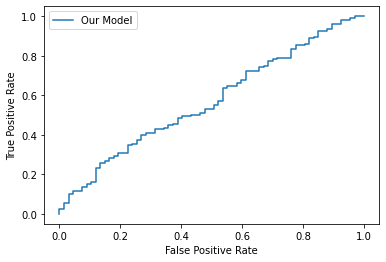

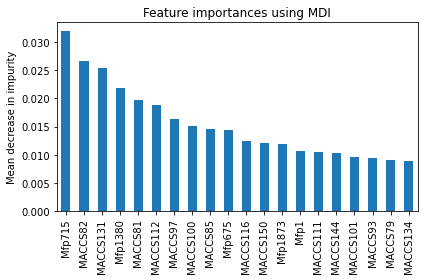

In [32]:
inner_cv = KFold(n_splits=4, random_state=53, shuffle=True) 
#Threshold Balancing
cross_val_prob_cp = cross_val_predict(classifier, X_ncv, y_ncv, cv=inner_cv, method='predict_proba', n_jobs=-1)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_ncv, cross_val_prob_cp)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh_cp = thresholds[ix]
print('Best Threshold=%f' % (best_thresh_cp))


y_proba = classifier.predict_proba(X_heldouttest)[:,1]
y_pred  = [ 1 if x>best_thresh_cp  else 0 for x in y_proba ] 

test_data_heldouttest["mfp_maccs_preds"] = y_pred
test_data_heldouttest["mfp_maccs_proba"] = y_proba

conf_matrix = confusion_matrix(y_heldouttest, y_pred)
print(conf_matrix)
print(classification_report(y_heldouttest, y_pred))
print('balanced_accuracy_score ',balanced_accuracy_score(y_heldouttest, y_pred))
print('matthews_corrcoef ',matthews_corrcoef(y_heldouttest, y_pred))

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
# Specificity or true negative rate
Specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]) 

print(Sensitivity)
print(Specificity)


print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    
importances = classifier.feature_importances_
forest_importances = pd.Series(importances, index=test_feature_list)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False)[:20].plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
    
plt.show()

roc_auc_score 0.5698430922311518


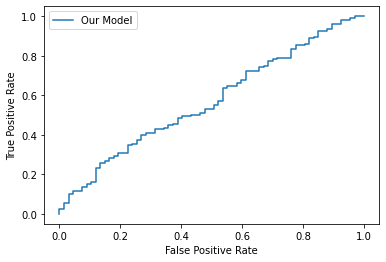

In [33]:
print("roc_auc_score", roc_auc_score(y_heldouttest, y_proba))    
# calculate roc curves
best_model_fpr, best_model_tpr, _ = roc_curve(y_heldouttest, y_proba)
# plot the roc curve for the model
plt.plot(best_model_fpr, best_model_tpr, label='Our Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
    

In [34]:
df = pd.DataFrame()
df["fpr"]=best_model_fpr
df["tpr"]=best_model_tpr
#tpr is sensitivity
df["thresholds"]=np.round(_, 8)

In [35]:
df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.933576
1,0.000000,0.006410,0.933576
2,0.000000,0.025641,0.911194
3,0.014925,0.025641,0.898911
4,0.014925,0.057692,0.861141
...,...,...,...
97,0.955224,0.980769,0.410782
98,0.955224,0.993590,0.402824
99,0.970149,0.993590,0.380578
100,0.970149,1.000000,0.328631


In [36]:
df_analyse = test_data_heldouttest[["smiles_r","TOXICITY","Source_rank","Source","Data", "all_features_preds", "all_features_proba", "mfp_maccs_preds", "mfp_maccs_proba"]]
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba,mfp_maccs_preds,mfp_maccs_proba
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,1,0.728152,1,0.754960
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,0,0.581439,0,0.535236
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,0,0.576492,0,0.402824
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,0,0.463513,0,0.551885
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,1,0.714039,1,0.630923
...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,0,0.564779,1,0.701466
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,1,0.775135,1,0.647040
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,1,0.753467,1,0.858123
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,0,0.486452,0,0.380578


In [37]:
P=[]
N=[]
TP=[]
FP=[]
TN=[]
FN=[]

for threshold in df["thresholds"].to_list():

    P.append(len(df_analyse[df_analyse["mfp_maccs_proba"]>=threshold]))
    N.append(len(df_analyse[df_analyse["mfp_maccs_proba"]<threshold]))
    
    df_analyse_P = df_analyse[df_analyse["TOXICITY"]==1]
    TP.append(len(df_analyse_P[df_analyse_P["mfp_maccs_proba"]>=threshold]))
    FN.append(len(df_analyse_P[df_analyse_P["mfp_maccs_proba"]<threshold]))
    
    df_analyse_N = df_analyse[df_analyse["TOXICITY"]==0]
    FP.append(len(df_analyse_N[df_analyse_N["mfp_maccs_proba"]>=threshold]))
    TN.append(len(df_analyse_N[df_analyse_N["mfp_maccs_proba"]<threshold]))
                       
df["predP"] = P
df["predN"]= N
df["TP"] = TP
df["TN"]= TN
df["FP"] = FP
df["FN"]= FN

df_maccsmfp_tpr_fpr = df
df_maccsmfp_tpr_fpr["PPV"] = df_maccsmfp_tpr_fpr["TP"]/df_maccsmfp_tpr_fpr["predP"]
df_maccsmfp_tpr_fpr["LR+"] = ((df_maccsmfp_tpr_fpr["TP"])/(df_maccsmfp_tpr_fpr["TP"]+df_maccsmfp_tpr_fpr["FN"]))/((df_maccsmfp_tpr_fpr["FP"])/(df_maccsmfp_tpr_fpr["FP"]+df_maccsmfp_tpr_fpr["TN"]))
df_maccsmfp_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.933576,0,223,0,67,0,156,NaN,NaN
1,0.000000,0.006410,0.933576,1,222,1,67,0,155,1.000000,inf
2,0.000000,0.025641,0.911194,3,220,3,67,0,153,1.000000,inf
3,0.014925,0.025641,0.898911,4,219,4,67,0,152,1.000000,inf
4,0.014925,0.057692,0.861141,10,213,9,66,1,147,0.900000,3.865385
...,...,...,...,...,...,...,...,...,...,...,...
97,0.955224,0.980769,0.410782,216,7,153,4,63,3,0.708333,1.043040
98,0.955224,0.993590,0.402824,218,5,154,3,64,2,0.706422,1.033454
99,0.970149,0.993590,0.380578,219,4,155,3,64,1,0.707763,1.040164
100,0.970149,1.000000,0.328631,221,2,156,2,65,0,0.705882,1.030769


In [38]:
df_all_features_tpr_fpr

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.863313,0,223,0,67,0,156,NaN,NaN
1,0.000000,0.006410,0.863313,0,223,0,67,0,156,NaN,NaN
2,0.014925,0.006410,0.859563,2,221,1,66,1,155,0.500000,0.429487
3,0.014925,0.032051,0.847730,6,217,5,66,1,151,0.833333,2.147436
4,0.029851,0.032051,0.847187,6,217,5,66,1,151,0.833333,2.147436
...,...,...,...,...,...,...,...,...,...,...,...
96,0.970149,0.974359,0.398939,216,7,152,3,64,4,0.703704,1.020032
97,0.970149,0.980769,0.386789,217,6,152,2,65,4,0.700461,1.004339
98,0.985075,0.980769,0.384275,219,4,153,1,66,3,0.698630,0.995629
99,0.985075,1.000000,0.342263,222,1,156,1,66,0,0.702703,1.015152


In [39]:
df_maccsmfp_tpr_fpr[:15]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
0,0.000000,0.000000,1.933576,0,223,0,67,0,156,NaN,NaN
1,0.000000,0.006410,0.933576,1,222,1,67,0,155,1.000000,inf
2,0.000000,0.025641,0.911194,3,220,3,67,0,153,1.000000,inf
3,0.014925,0.025641,0.898911,4,219,4,67,0,152,1.000000,inf
4,0.014925,0.057692,0.861141,10,213,9,66,1,147,0.900000,3.865385
5,0.029851,0.057692,0.858123,11,212,9,65,2,147,0.818182,1.932692
6,0.029851,0.102564,0.806723,18,205,16,65,2,140,0.888889,3.435897
7,0.044776,0.102564,0.805132,19,204,16,64,3,140,0.842105,2.290598
8,0.044776,0.115385,0.797089,20,203,17,64,3,139,0.850000,2.433761
9,0.074627,0.115385,0.790556,23,200,18,62,5,138,0.782609,1.546154


<AxesSubplot:xlabel='thresholds', ylabel='LR+'>

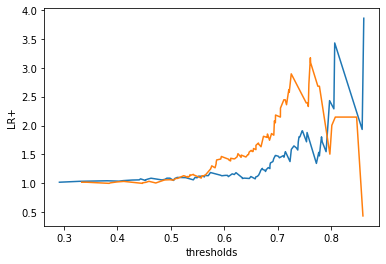

In [40]:
import seaborn as sns
sns.lineplot(data=df_maccsmfp_tpr_fpr, x="thresholds", y="LR+")
sns.lineplot(data=df_all_features_tpr_fpr, x="thresholds", y="LR+")

In [41]:
df_all_features_tpr_fpr[df_all_features_tpr_fpr["predP"]>=25]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
9,0.059701,0.160256,0.778068,29,194,25,63,4,131,0.862069,2.684295
10,0.074627,0.160256,0.775135,29,194,25,63,4,131,0.862069,2.684295
11,0.074627,0.237179,0.761621,41,182,36,62,5,120,0.878049,3.092308
12,0.089552,0.237179,0.761134,42,181,37,62,5,119,0.880952,3.178205
13,0.089552,0.243590,0.758341,44,179,38,61,6,118,0.863636,2.720085
...,...,...,...,...,...,...,...,...,...,...,...
96,0.970149,0.974359,0.398939,216,7,152,3,64,4,0.703704,1.020032
97,0.970149,0.980769,0.386789,217,6,152,2,65,4,0.700461,1.004339
98,0.985075,0.980769,0.384275,219,4,153,1,66,3,0.698630,0.995629
99,0.985075,1.000000,0.342263,222,1,156,1,66,0,0.702703,1.015152


In [42]:
df_maccsmfp_tpr_fpr[df_maccsmfp_tpr_fpr["predP"]>=15]

,fpr,tpr,thresholds,predP,predN,TP,TN,FP,FN,PPV,LR+
6,0.029851,0.102564,0.806723,18,205,16,65,2,140,0.888889,3.435897
7,0.044776,0.102564,0.805132,19,204,16,64,3,140,0.842105,2.290598
8,0.044776,0.115385,0.797089,20,203,17,64,3,139,0.850000,2.433761
9,0.074627,0.115385,0.790556,23,200,18,62,5,138,0.782609,1.546154
10,0.074627,0.134615,0.783345,25,198,20,62,5,136,0.800000,1.717949
...,...,...,...,...,...,...,...,...,...,...,...
97,0.955224,0.980769,0.410782,216,7,153,4,63,3,0.708333,1.043040
98,0.955224,0.993590,0.402824,218,5,154,3,64,2,0.706422,1.033454
99,0.970149,0.993590,0.380578,219,4,155,3,64,1,0.707763,1.040164
100,0.970149,1.000000,0.328631,221,2,156,2,65,0,0.705882,1.030769


In [45]:
# Choosnig threshold for 31 compounds first predicted

df_analyse["mfp_earlydetections"] = df_analyse["mfp_maccs_proba"]>= 0.779980 
df_analyse["allfeatures_earlydetections"] = df_analyse["all_features_proba"]>= 0.778068

/tmp/ipykernel_2471255/908922987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["mfp_earlydetections"] = df_analyse["mfp_maccs_proba"]>= 0.779980
/tmp/ipykernel_2471255/908922987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyse["allfeatures_earlydetections"] = df_analyse["all_features_proba"]>= 0.778068


In [46]:
df_analyse

,smiles_r,TOXICITY,Source_rank,Source,Data,all_features_preds,all_features_proba,mfp_maccs_preds,mfp_maccs_proba,mfp_earlydetections,allfeatures_earlydetections
0,C#Cc1cccc(N=c2[nH]cnc3cc(OCCOC)c(OCCOC)cc23)c1,1,1,DILIst Classification Oral,DILI,1,0.728152,1,0.754960,False,False
1,CC1OC1[P](=O)(=O)O,1,1,DILIst Classification Oral,DILI,0,0.581439,0,0.535236,False,False
2,CC(C)CC(N(C)C)C1(c2ccc(Cl)cc2)CCC1,1,1,DILIst Classification Oral,DILI,0,0.576492,0,0.402824,False,False
3,COCCCOc1cc(CC(CC(N)C(O)CC(C(=O)NCC(C)(C)C(N)=O...,1,1,DILIst Classification Oral,DILI,0,0.463513,0,0.551885,False,False
4,CNC1CCC(c2ccc(Cl)c(Cl)c2)c2ccccc21,1,1,DILIst Classification Oral,DILI,1,0.714039,1,0.630923,False,False
...,...,...,...,...,...,...,...,...,...,...,...
218,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,0,1,DILIst Classification Topical,DILI,0,0.564779,1,0.701466,False,False
219,Oc1c(C2=CCC(c3ccc(Cl)cc3)CC2)c(O)c2ccccc2c1O,0,1,DILIst Classification Oral,DILI,1,0.775135,1,0.647040,False,False
220,C=Cc1ccc(S(=O)(=O)O)cc1,0,1,DILIst Classification Oral,DILI,1,0.753467,1,0.858123,True,False
221,OCC(O)c1oc(O)c(O)c1O,0,1,DILIst Classification Intravenous,DILI,0,0.486452,0,0.380578,False,False


In [47]:
#df_early = df_analyse[df_analyse["TOXICITY"]==1]
#df_early = df_early[df_early["mfp_earlydetections"]==False]
#df_early = df_early[df_early["allfeatures_earlydetections"]==True]
#df_early

In [48]:
#len(df_early)

In [49]:
df_analyse.to_csv("Heldout_test_predictions_earlydetection.csv", index=False)